In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline
sns.set(style="whitegrid")

In [4]:
df = pd.read_csv('/content/cardio_train (1).csv', sep=';')
df.drop(columns=['id'], inplace=True)
df['age'] = (df['age'] / 365).astype(int)

In [5]:
df_clean = df[
    (df['height'] > 100) & (df['height'] < 220) &
    (df['weight'] > 30) & (df['weight'] < 200) &
    (df['ap_hi'] > 80) & (df['ap_hi'] < 240) &
    (df['ap_lo'] > 40) & (df['ap_lo'] < 180) &
    (df['ap_hi'] > df['ap_lo'])
]

In [6]:
plt.figure(figsize=(16, 12))

<Figure size 1600x1200 with 0 Axes>

<Figure size 1600x1200 with 0 Axes>

Text(0.5, 1.0, 'Age Distribution')

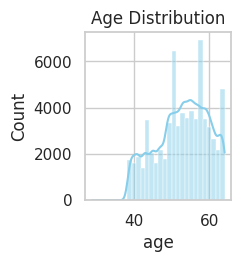

In [7]:
plt.subplot(2, 3, 1)
sns.histplot(df_clean['age'], kde=True, bins=30, color='skyblue')
plt.title('Age Distribution')

/tmp/ipython-input-8-2024993157.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=df_clean, palette='Set2')


Text(0.5, 1.0, 'Gender Distribution')

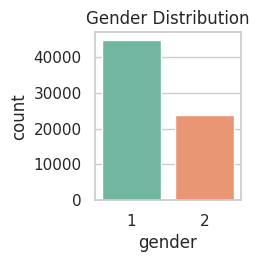

In [8]:
plt.subplot(2, 3, 2)
sns.countplot(x='gender', data=df_clean, palette='Set2')
plt.title('Gender Distribution')

Text(0.5, 1.0, 'Cholesterol vs Cardio')

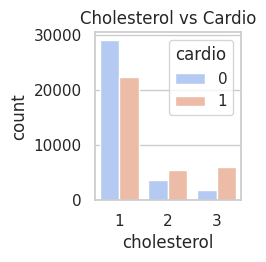

In [9]:
plt.subplot(2, 3, 3)
sns.countplot(x='cholesterol', hue='cardio', data=df_clean, palette='coolwarm')
plt.title('Cholesterol vs Cardio')

Text(0.5, 1.0, 'Glucose vs Cardio')

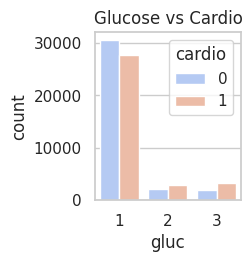

In [10]:
plt.subplot(2, 3, 4)
sns.countplot(x='gluc', hue='cardio', data=df_clean, palette='coolwarm')
plt.title('Glucose vs Cardio')

Text(0.5, 1.0, 'Activity vs Cardio')

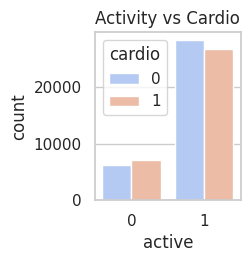

In [11]:
plt.subplot(2, 3, 5)
sns.countplot(x='active', hue='cardio', data=df_clean, palette='coolwarm')
plt.title('Activity vs Cardio')

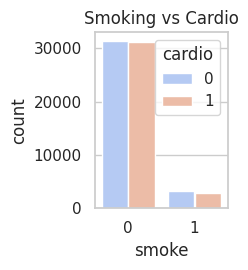

In [12]:
plt.subplot(2, 3, 6)
sns.countplot(x='smoke', hue='cardio', data=df_clean, palette='coolwarm')
plt.title('Smoking vs Cardio')

plt.tight_layout()
plt.show()

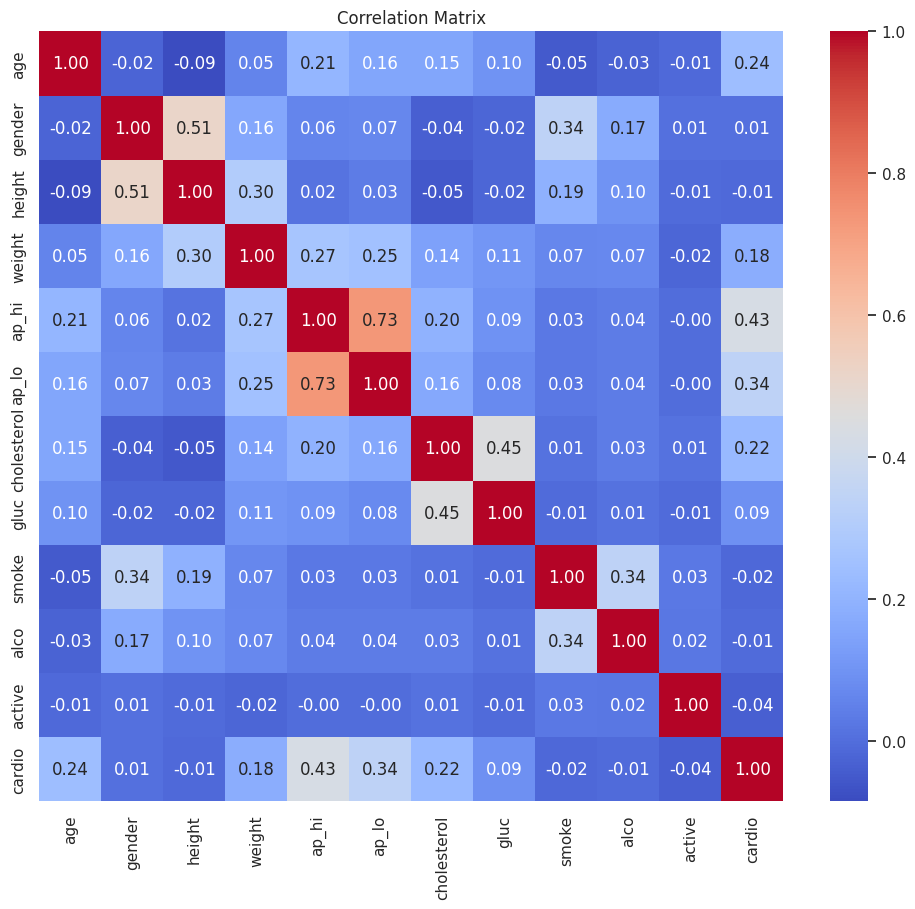

In [13]:
# Correlation Matrix
plt.figure(figsize=(12, 10))
corr = df_clean.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Features and target
X = df_clean.drop('cardio', axis=1)
y = df_clean['cardio']

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Models
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Train and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")


Logistic Regression Accuracy: 0.7291
